In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [4]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('MEDV',axis=1),
                                                    df['MEDV'], 
                                                    test_size=0.2, 
                                                    random_state=1492
                                                    )

### Линейная регрессия

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
pred = model.predict(X_test)

In [7]:
print('Среднеквадратическая ошибка (RMSE) линейной регресии =', sqrt(mean_squared_error(y_test, pred)))
print('Средняя абсолютная ошибка (MAE) линейной регресии =', mean_absolute_error(y_test, pred))
print('Коэффициент детерминации (R^2) линейной регресии =', r2_score(y_test, pred))

Среднеквадратическая ошибка (RMSE) линейной регресии = 4.723551035099205
Средняя абсолютная ошибка (MAE) линейной регресии = 3.260222772945213
Коэффициент детерминации (R^2) линейной регресии = 0.7283197647895523


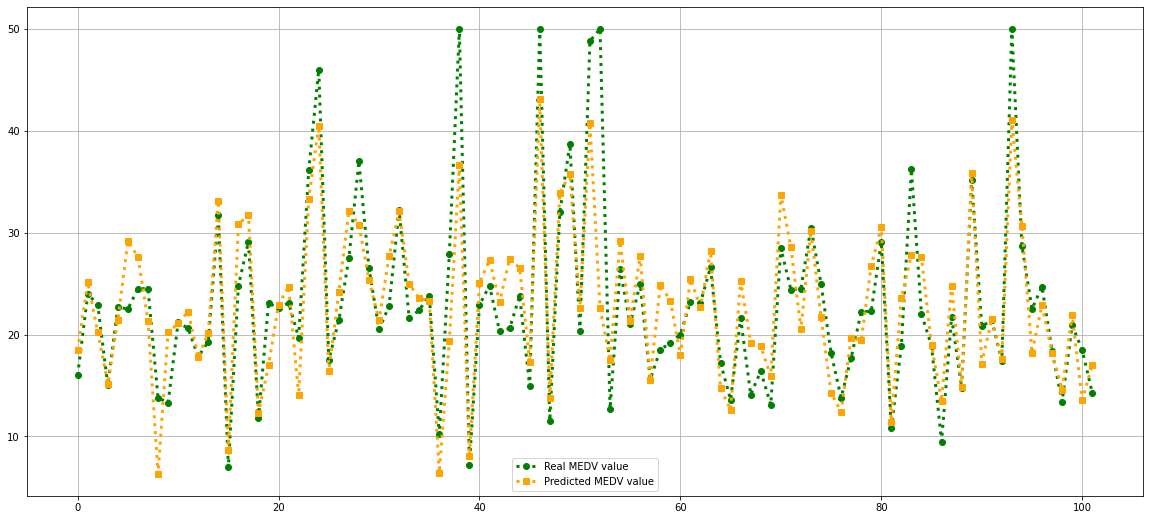

In [8]:
plt.figure(figsize=(20,9))
plt.plot(y_test.values, "green", ls=':', marker='o', linewidth=3, label = 'Real MEDV value')
plt.plot(pred, "orange", ls=':', marker='s', linewidth=3, label = 'Predicted MEDV value')
plt.legend(loc='lower center')
plt.grid(True)
plt.show()

### Решающие деревья

In [9]:
tree_regressor = tree.DecisionTreeRegressor()
tree_regressor.fit(X_train, y_train)
pred_tree = tree_regressor.predict(X_test)

In [10]:
# print('Ошибка RMSE DecisionTreeRegressor = ', sqrt(mean_squared_error(y_test, pred_tree)))
print('Среднеквадратическая ошибка (RMSE) DecisionTreeRegressor =', sqrt(mean_squared_error(y_test, pred_tree)))
print('Средняя абсолютная ошибка (MAE) DecisionTreeRegressor =', mean_absolute_error(y_test, pred_tree))
print('Коэффициент детерминации (R^2) DecisionTreeRegressor =', r2_score(y_test, pred_tree))

Среднеквадратическая ошибка (RMSE) DecisionTreeRegressor = 4.349622476293145
Средняя абсолютная ошибка (MAE) DecisionTreeRegressor = 3.170588235294117
Коэффициент детерминации (R^2) DecisionTreeRegressor = 0.7696310467828269
